In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


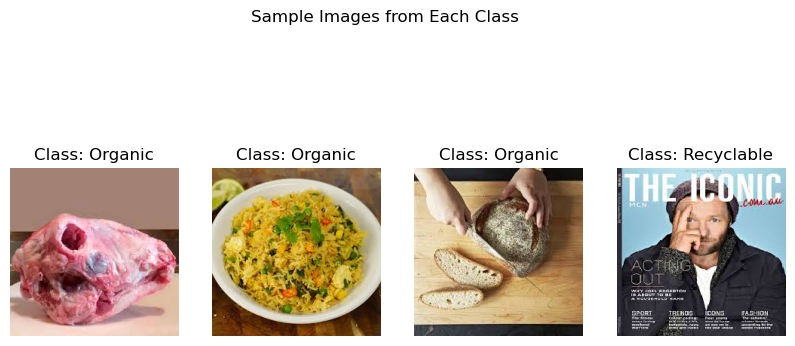

In [23]:
# Set up paths to the train and test distionaries
base_dir = r"/Users/pramodjumde/Downloads/DATASET/DATASET"
train_dir = base_dir + r"/TRAIN"
test_dir = base_dir + r"/TEST"

# Use ImageDataGenerator to prepare the data for training and testing
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

# Display sample images from each class
plt.figure(figsize=(10, 5))
for i in range(4):    # Display 4 images (2 from each if available)
    image, label = next(train_data)
    plt.subplot(1, 4, i + 1)
    plt.imshow(image[0])
    plt.title("Class: " + ("Organic" if label[0] == 0 else "Recyclable"))
    plt.axis('off')
plt.suptitle("Sample Images from Each Class")
plt.show()

In [25]:
mobilenet_model = tf.keras.applications.MobileNetV2(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')
mobilenet_model.trainable = False    # Freeze base model layers

# Add custom layers for classification
model = tf.keras.Sequential([
    mobilenet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# We start with a pre-trained MobileNet model, adding layers to classify waste images into O or R

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [27]:
history = model.fit(
    train_data,
    epochs = 5,
    validation_data = test_data
)

#  After training the model, save it to a file
model.save('mobilenet_waste_classification.h5')

loss, accuracy = model.evaluate(test_data)
print("Model Accuracy:", accuracy)

# The model learns over 5 epochs images in the training data,, adjusting itself, and testing on new images

/Users/pramodjumde/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 1005s 1s/step - accuracy: 0.8684 - loss: 0.3057 - val_accuracy: 0.8945 - val_loss: 0.2503
Epoch 2/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 960s 1s/step - accuracy: 0.9329 - loss: 0.1786 - val_accuracy: 0.8607 - val_loss: 0.3137
Epoch 3/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 931s 1s/step - accuracy: 0.9378 - loss: 0.1606 - val_accuracy: 0.8874 - val_loss: 0.2788
Epoch 4/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 948s 1s/step - accuracy: 0.9459 - loss: 0.1466 - val_accuracy: 0.9125 - val_loss: 0.2174
Epoch 5/5
706/706 ━━━━━━━━━━━━━━━━━━━━ 959s 1s/step - accuracy: 0.9449 - loss: 0.1431 - val_accuracy: 0.9125 - val_loss: 0.2200


79/79 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9126 - loss: 0.2148
Model Accuracy: 0.9124552607536316


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions
y_pred_prob = model.predict(test_data).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)    # Convert probabilities to binary predictions
y_true = test_data.classes    # True labels from test data

# Print classification report
print('Classification Report:\n', classification_report(y_true, y_pred, target_names = ['Organic', 'Recyclable']))

# Print classification report
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matriz:\n", conf_matrix)

# Here, we measure the performance of the model

79/79 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step
Classification Report:
               precision    recall  f1-score   support

     Organic       0.55      0.59      0.57      1401
  Recyclable       0.44      0.40      0.42      1112

    accuracy                           0.51      2513
   macro avg       0.50      0.50      0.49      2513
weighted avg       0.50      0.51      0.50      2513

Confusion Matriz:
 [[827 574]
 [666 446]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


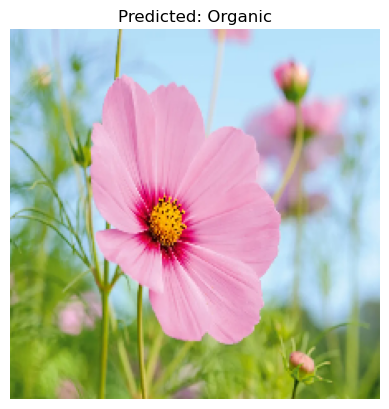

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to the trained model and test image
model_path = 'mobilenet_waste_classification.h5'
test_image_path = r"/Users/pramodjumde/Downloads/flower.jpg"

# Load the trained model
model = tf.keras.models.load_model(model_path)

# Load and prepare the test image
test_img = load_img(test_image_path, target_size = (224, 224))    # Load image and resize
test_img_array = img_to_array(test_img) / 255.0    # Normalize pixel values
test_img_array = np.expand_dims(test_img_array, axis = 0)    # Ad batch dimension

# Predict the class of the test image
predicted_prob = model.predict(test_img_array)[0][0]
predicted_class = 'Organic' if predicted_prob < 0.5 else 'Non Organic'

# Display the test image and prediction
plt.imshow(test_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()